In [11]:
# Loading in dependencies and data
# Going to limit the scope of this as much as possible
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data_sources/clean_train.csv", index_col=0)

In [12]:
df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Misc Feature_TenC', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=407)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Columns: 407 entries, Id to Sale Type_WD 
dtypes: float64(10), int64(397)
memory usage: 6.4 MB


In [15]:
year_columns = ['Year Built', 'Year Remod/Add','Yr Sold']
df[year_columns].head()

,Year Built,Year Remod/Add,Yr Sold
0,1976,2005,2010
1,1996,1997,2009
2,1953,2007,2010
3,2006,2007,2010
4,1900,1993,2010


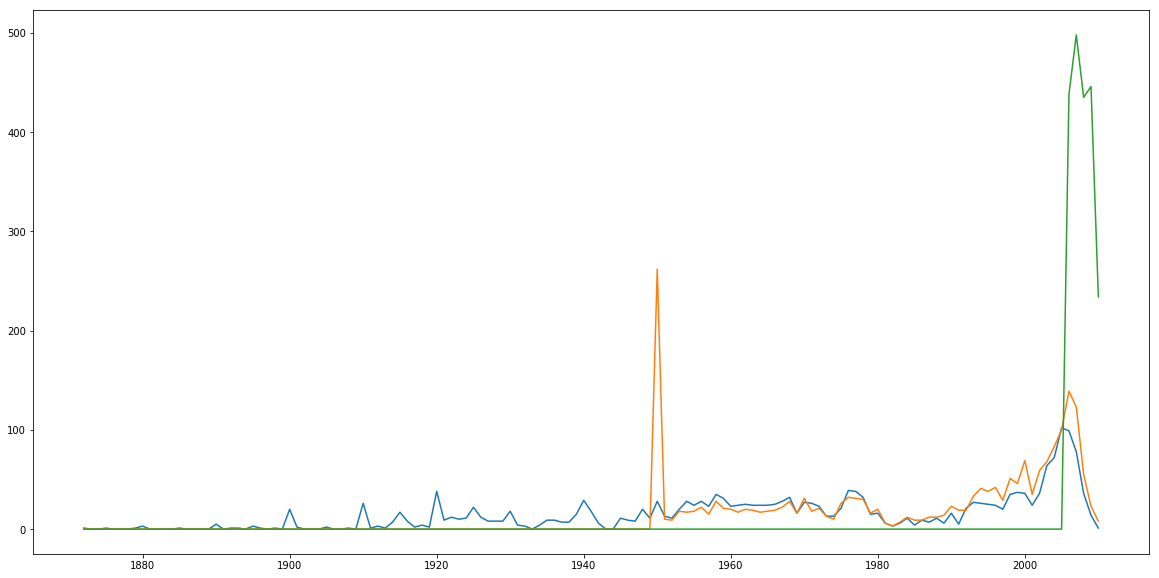

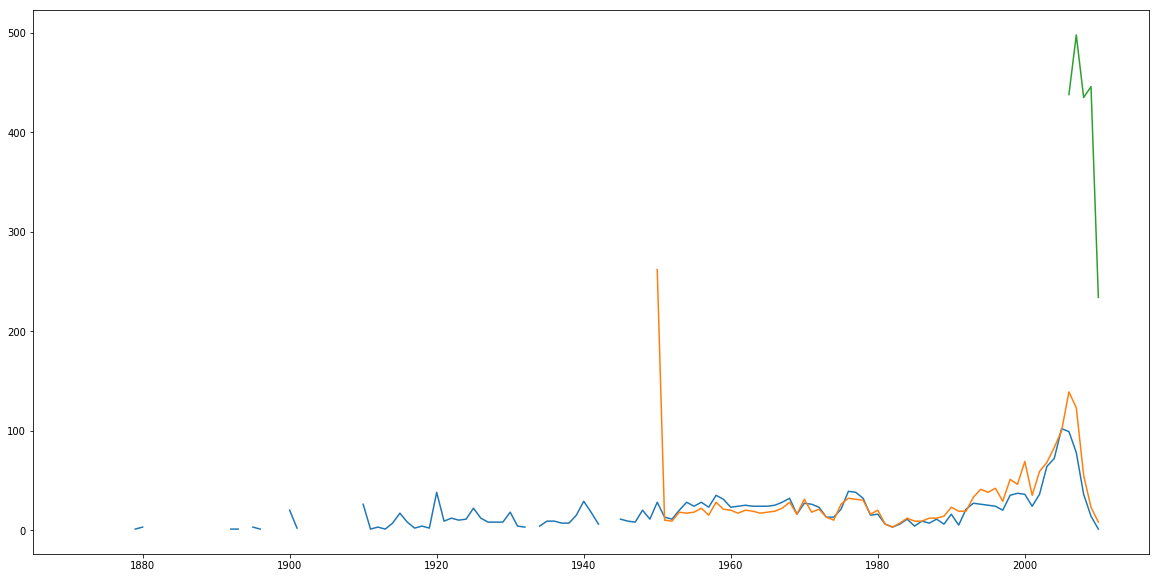

In [18]:
year_columns_dict = {yc: [] for yc in year_columns}
index = []
for i in range(df[year_columns].min()[0], (df[year_columns].max()[0] + 1)):
    index.append(i)
# Comparing missing data
# versus
# Adding zero's
for val in [0, np.nan]:
    for yc in year_columns:
        new_df = df[year_columns].groupby(yc).size()
        for i in index:
            if i not in new_df.index.tolist():
                new_df[i] = val
        year_columns_dict[yc] = new_df.sort_index().values.tolist()

    plt.figure(figsize=(20,10))
    for k,v in year_columns_dict.items():
        plt.plot(index, v, label=k)
        